<a href="https://colab.research.google.com/github/shahdhruv29/woc5.0-ml-weather-prediction-case-study-dhruvshah29/blob/main/Checkpoint5_Woc5_0_MidEval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df= pd.read_csv('/content/weather.csv')
print(df.head())

   precipitation  temp_max  temp_min  wind  weather
0            0.0      12.8       5.0   4.7  drizzle
1           10.9      10.6       2.8   4.5     rain
2            0.8      11.7       7.2   2.3     rain
3           20.3      12.2       5.6   4.7     rain
4            1.3       8.9       2.8   6.1     rain


In [8]:
print(df)

      precipitation  temp_max  temp_min  wind  weather
0               0.0      12.8       5.0   4.7  drizzle
1              10.9      10.6       2.8   4.5     rain
2               0.8      11.7       7.2   2.3     rain
3              20.3      12.2       5.6   4.7     rain
4               1.3       8.9       2.8   6.1     rain
...             ...       ...       ...   ...      ...
1456            8.6       4.4       1.7   2.9     rain
1457            1.5       5.0       1.7   1.3     rain
1458            0.0       7.2       0.6   2.6      fog
1459            0.0       5.6      -1.0   3.4      sun
1460            0.0       5.6      -2.1   3.5      sun

[1461 rows x 5 columns]


In [9]:
print(df.dtypes)

precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X =df[['precipitation','temp_max', 'temp_min', 'wind']]
y= df['weather']

In [ ]:
print(X)

      precipitation  temp_max  temp_min  wind
0               0.0      12.8       5.0   4.7
1              10.9      10.6       2.8   4.5
2               0.8      11.7       7.2   2.3
3              20.3      12.2       5.6   4.7
4               1.3       8.9       2.8   6.1
...             ...       ...       ...   ...
1456            8.6       4.4       1.7   2.9
1457            1.5       5.0       1.7   1.3
1458            0.0       7.2       0.6   2.6
1459            0.0       5.6      -1.0   3.4
1460            0.0       5.6      -2.1   3.5

[1461 rows x 4 columns]


In [13]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=10)

In [14]:
print(len(X_train), len(X_test))

1168 293


In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
predictions = model.predict(X_test)
print(predictions[0:10])

['rain' 'sun' 'rain' 'sun' 'sun' 'rain' 'sun' 'sun' 'sun' 'sun']


In [21]:
print(y_test[0:10])

855        rain
381     drizzle
721        rain
577         sun
35          sun
301        rain
689         sun
1019        sun
1252        sun
861         sun
Name: weather, dtype: object


In [19]:
score = model.score(X_test, y_test)
print(score)

0.856655290102389


In [22]:
from sklearn import metrics
cm= metrics.confusion_matrix(y_test, predictions, labels=["rain", "drizzle", "sun", "snow"])
print(cm)

[[121   0   7   0]
 [  0   0   9   0]
 [  0   0 130   0]
 [  5   0   0   0]]


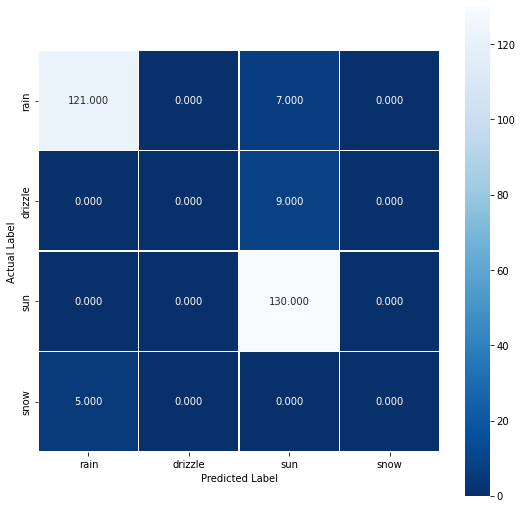

In [34]:
import seaborn as sns
plt.figure(figsize=(9,9))
labels=['rain', 'drizzle', 'sun', 'snow']
sns.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score: {0}'.format(score)